## Data Scrubbing

In [1]:
import numpy as np
import pandas as pd

input_file = "./train.csv"

def AgeGroup(x):
    if x < 13:
        return 0
    elif x < 18:
        return 1
    elif x < 60:
        return 2
    else:
        return 3

def Embark(x):
    if x == 'S':
        return 0
    elif x == 'C':
        return 1
    elif x == 'Q':
        return 2
    else:
        return x
    
def FamilySize(x):
    if x == 1:
        return 0
    elif x < 5:
        return 1
    else:
        return 2
    
def Title(x):
    if x == 'Mlle':
        return 'Miss'
    elif x == 'Ms':
        return 'Miss'
    elif x == 'Mme':
        return 'Mrs'
    elif x == 'Lady':
        return 'Miss'
    elif x  == 'Dona':
        return 'Miss'
    elif x  == 'Capt':
        return 'Officer'
    elif x == 'Col':
        return 'Officer'
    elif x == 'Major':
        return 'Officer'
    elif x == 'Dr':
        return 'Officer'
    elif x == 'Rev':
        return 'Officer'
    elif x == 'Don':
        return 'Officer'
    elif x == 'Sir':
        return 'Officer'
    elif x == 'the Countess':
        return 'Officer'
    elif x == 'Jonkheer':
        return 'Officer'
    else:
        return x
    
def TitleGroup(x):
    if x == 'Mr':
        return 0
    elif x == 'Miss':
        return 1
    elif x == 'Mrs':
        return 2
    elif x == 'Master':
        return 3
    elif x == 'Officer':
        return 4
    else:
        return 5
    
def TicketSize(x):
    if x == 1:
        return 0
    elif x < 5:
        return 1
    else:
        return 2
        

# comma delimited is the default
passengers = pd.read_csv(input_file, header = 0)

passengers['Sex'] = passengers \
    .apply(lambda row: row['Sex'] == 'female', axis = 1).astype(int)

passengers['Age'] = passengers['Age'].fillna(round(passengers['Age'].mean(), 2))

passengers['AgeGroup'] = passengers['Age'].apply(lambda x: AgeGroup(x))

passengers['Embarked'] = passengers['Embarked'] \
    .fillna(passengers['Embarked'].value_counts().idxmax())
    
passengers['Embarked'] = passengers['Embarked'] \
    .apply(lambda x: Embark(x)).astype(int)

passengers['Title'] = passengers['Name'] \
    .replace("^.*, (.*?)\\..*$", "\\1", regex = True) \
    .apply(lambda x: Title(x))

passengers['FamilySize'] = passengers[['SibSp', 'Parch']] \
    .apply(lambda x: FamilySize(x['SibSp'] + x['Parch'] + 1), axis = 1)
    
passengers['TitleGroup'] = passengers['Title'].apply(lambda x: TitleGroup(x))

passengers['TicketSize'] = passengers.groupby(['Ticket'])['Ticket'].transform('count')
passengers['TicketSize'] = passengers['TicketSize'].apply(lambda x: TicketSize(x))

pd.DataFrame.head(passengers, 5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked  AgeGroup Title  FamilySize  \
0         A/5 21171   7.2500   NaN         0         2    Mr           1   
1          PC 17599  71.2833   C85         1         2   Mrs           1   
2  STON/O2. 3101282   7.9250   NaN         0         2  Miss           0   
3            113803  53.1000  C123         0         2   Mrs           1   
4            373450   8.0500   NaN         0         2    Mr           0   

   TitleGroup  TicketSize  
0           0           0  
1           2           0  
2           1           0  
3           2           1  
4           0           0

## Dicision Tree Setup

In [2]:
from sklearn.tree import DecisionTreeClassifier

X = passengers[['Pclass', 'Sex', 'Embarked', 'AgeGroup', 'FamilySize', 'TitleGroup']]
y = passengers['Survived']

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Create Decision Tree Graph

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file = 'survivor.dot',
    feature_names = ['Pclass', 'Sex', 'Embarked', 'AgeGroup', 'FamilySize', 'TitleGroup'],
    class_names = ['Perished', 'Survived'],
    rounded = True,
    filled = True
)

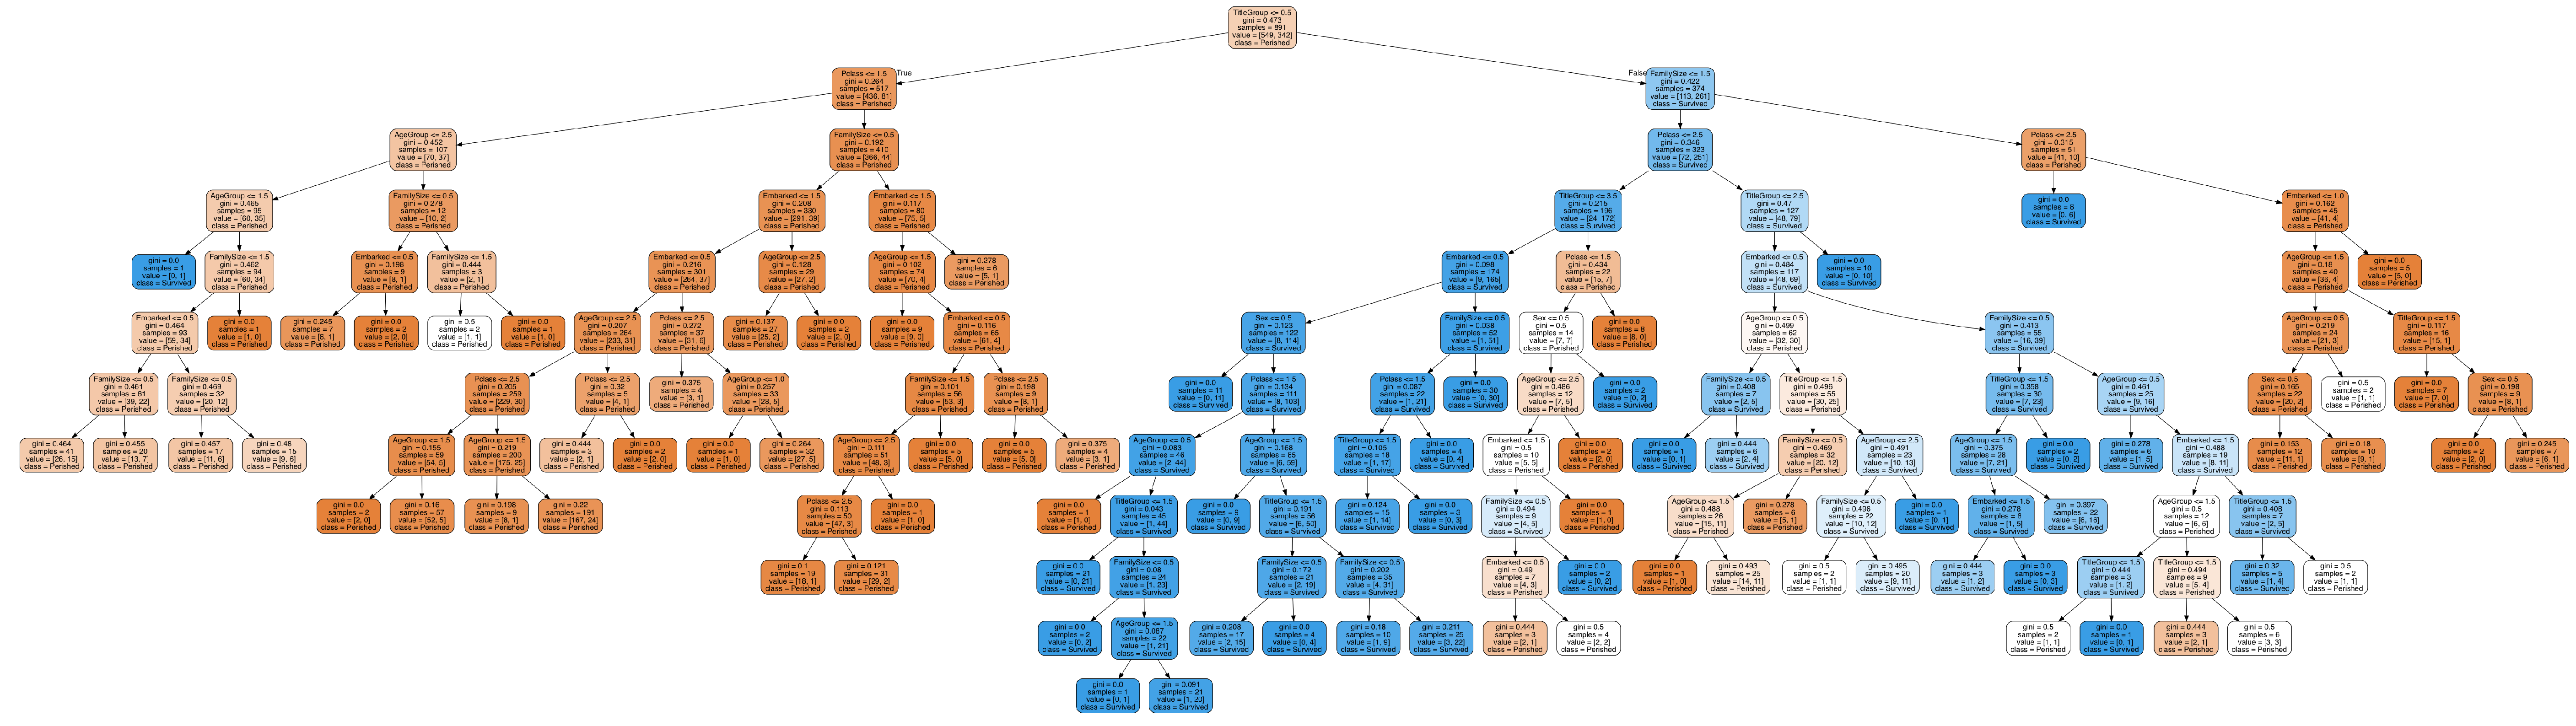

In [4]:
from io import StringIO
from sklearn import tree

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#from graphviz import *

import matplotlib.image as mpimg
import pydotplus

classifier = tree_clf
dotfile = open("survivor.dot", 'w')
tree.export_graphviz(
    classifier,
    out_file = dotfile,
    feature_names = ['Pclass', 'Sex', 'Embarked', 'AgeGroup', 'FamilySize', 'TitleGroup'],
    class_names = ['Perished', 'Survived'],
    rounded = True,
    filled = True
)
dotfile.close()
dot_data = StringIO()
tree.export_graphviz(
    classifier,
    out_file = dot_data,
    feature_names = ['Pclass', 'Sex', 'Embarked', 'AgeGroup', 'FamilySize', 'TitleGroup'],
    class_names = ['Perished', 'Survived'],
    rounded = True,
    filled = True
)
graph = pydotplus.graph_from_dot_file("survivor.dot")
graph.write_png('survivor.png')
img = mpimg.imread('survivor.png')
fig = plt.figure(figsize=(100, 100)) 
plt.axis("off")
plt.imshow(img, cmap = plt.cm.binary, interpolation="nearest")
plt.show()

## Test Data Scrubbing

In [5]:
input_test_file = "./test.csv"

def AgeGroup(x):
    if x < 13:
        return 0
    elif x < 18:
        return 1
    elif x < 60:
        return 2
    else:
        return 3

def Embark(x):
    if x == 'S':
        return 0
    elif x == 'C':
        return 1
    elif x == 'Q':
        return 2
    else:
        return x
    
def FamilySize(x):
    if x == 1:
        return 0
    elif x < 5:
        return 1
    else:
        return 2
    
def Title(x):
    if x == 'Mlle':
        return 'Miss'
    elif x == 'Ms':
        return 'Miss'
    elif x == 'Mme':
        return 'Mrs'
    elif x == 'Lady':
        return 'Miss'
    elif x  == 'Dona':
        return 'Miss'
    elif x  == 'Capt':
        return 'Officer'
    elif x == 'Col':
        return 'Officer'
    elif x == 'Major':
        return 'Officer'
    elif x == 'Dr':
        return 'Officer'
    elif x == 'Rev':
        return 'Officer'
    elif x == 'Don':
        return 'Officer'
    elif x == 'Sir':
        return 'Officer'
    elif x == 'the Countess':
        return 'Officer'
    elif x == 'Jonkheer':
        return 'Officer'
    else:
        return x
    
def TitleGroup(x):
    if x == 'Mr':
        return 0
    elif x == 'Miss':
        return 1
    elif x == 'Mrs':
        return 2
    elif x == 'Master':
        return 3
    elif x == 'Officer':
        return 4
    else:
        return 5
        
def TicketSize(x):
    if x == 1:
        return 0
    elif x < 5:
        return 1
    else:
        return 2
        
# comma delimited is the default
test_passengers = pd.read_csv(input_test_file, header = 0)

test_passengers['Sex'] = test_passengers \
    .apply(lambda row: row['Sex'] == 'female', axis = 1).astype(int)

test_passengers['Age'] = test_passengers['Age'] \
    .fillna(round(test_passengers['Age'].mean(), 2))

test_passengers['AgeGroup'] = test_passengers['Age'].apply(lambda x: AgeGroup(x))

test_passengers['Embarked'] = test_passengers['Embarked'] \
    .fillna(test_passengers['Embarked'].value_counts().idxmax())
    
test_passengers['Embarked'] = test_passengers['Embarked'] \
    .apply(lambda x: Embark(x)).astype(int)

test_passengers['Title'] = test_passengers['Name'] \
    .replace("^.*, (.*?)\\..*$", "\\1", regex = True) \
    .apply(lambda x: Title(x))

test_passengers['FamilySize'] = test_passengers[['SibSp', 'Parch']] \
    .apply(lambda x: FamilySize(x['SibSp'] + x['Parch'] + 1), axis = 1)
    
test_passengers['TitleGroup'] = test_passengers['Title'].apply(lambda x: TitleGroup(x))

test_passengers['TicketSize'] = test_passengers \
    .groupby(['Ticket'])['Ticket'].transform('count')
test_passengers['TicketSize'] = test_passengers['TicketSize'].apply(lambda x: TicketSize(x))

pd.DataFrame.head(test_passengers, 5)

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, Mr. Thomas Francis    0   
3          895       3                              Wirz, Mr. Albert    0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   

    Age  SibSp  Parch   Ticket     Fare Cabin  Embarked  AgeGroup Title  \
0  34.5      0      0   330911   7.8292   NaN         2         2    Mr   
1  47.0      1      0   363272   7.0000   NaN         0         2   Mrs   
2  62.0      0      0   240276   9.6875   NaN         2         3    Mr   
3  27.0      0      0   315154   8.6625   NaN         0         2    Mr   
4  22.0      1      1  3101298  12.2875   NaN         0         2   Mrs   

   FamilySize  TitleGroup  TicketSize  
0           0           0           0  
1           1           2           0  
2           0           0           0  
3           0           0           0  
4           1           2           0

## Predict Probability of Survival for Test Data

In [6]:
tree_clf.predict_proba(test_passengers[['Pclass', 'Sex', 'Embarked', 'AgeGroup', 'FamilySize', 'TitleGroup']])[:10]

array([[0.92592593, 0.07407407],
       [0.45      , 0.55      ],
       [1.        , 0.        ],
       [0.87434555, 0.12565445],
       [0.45      , 0.55      ],
       [0.88888889, 0.11111111],
       [0.27272727, 0.72727273],
       [0.94736842, 0.05263158],
       [0.        , 1.        ],
       [0.93548387, 0.06451613]])

In [7]:
test_passengers['Survived'] = tree_clf \
    .predict(test_passengers[['Pclass', 'Sex', 'Embarked', 'AgeGroup', 'FamilySize', 'TitleGroup']])

## Export Prediction to CSV File

In [8]:
test_passengers[['PassengerId', 'Survived']] \
    .to_csv('test_(Pclass_Sex_Embarked_AgeGroup_FamilySize_TitleGroup)_results.csv', sep=',', index = False, encoding='utf-8')
pd.DataFrame.head(test_passengers)

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, Mr. Thomas Francis    0   
3          895       3                              Wirz, Mr. Albert    0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   

    Age  SibSp  Parch   Ticket     Fare Cabin  Embarked  AgeGroup Title  \
0  34.5      0      0   330911   7.8292   NaN         2         2    Mr   
1  47.0      1      0   363272   7.0000   NaN         0         2   Mrs   
2  62.0      0      0   240276   9.6875   NaN         2         3    Mr   
3  27.0      0      0   315154   8.6625   NaN         0         2    Mr   
4  22.0      1      1  3101298  12.2875   NaN         0         2   Mrs   

   FamilySize  TitleGroup  TicketSize  Survived  
0           0           0           0         0  
1           1           2           0         1  
2           0           0           0         0  
3           0           0           0         0  
4           1           2           0         1

## Data Scrubbing

In [9]:
import numpy as np
import pandas as pd

input_file = "./train.csv"

def AgeGroup(x):
    if x < 13:
        return 0
    elif x < 18:
        return 1
    elif x < 60:
        return 2
    else:
        return 3

def Embark(x):
    if x == 'S':
        return 0
    elif x == 'C':
        return 1
    elif x == 'Q':
        return 2
    else:
        return x
    
def FamilySize(x):
    if x == 1:
        return 0
    elif x < 5:
        return 1
    else:
        return 2
    
def Title(x):
    if x == 'Mlle':
        return 'Miss'
    elif x == 'Ms':
        return 'Miss'
    elif x == 'Mme':
        return 'Mrs'
    elif x == 'Lady':
        return 'Miss'
    elif x  == 'Dona':
        return 'Miss'
    elif x  == 'Capt':
        return 'Officer'
    elif x == 'Col':
        return 'Officer'
    elif x == 'Major':
        return 'Officer'
    elif x == 'Dr':
        return 'Officer'
    elif x == 'Rev':
        return 'Officer'
    elif x == 'Don':
        return 'Officer'
    elif x == 'Sir':
        return 'Officer'
    elif x == 'the Countess':
        return 'Officer'
    elif x == 'Jonkheer':
        return 'Officer'
    else:
        return x
    
def TitleGroup(x):
    if x == 'Mr':
        return 0
    elif x == 'Miss':
        return 1
    elif x == 'Mrs':
        return 2
    elif x == 'Master':
        return 3
    elif x == 'Officer':
        return 4
    else:
        return 5
    
def TicketSize(x):
    if x == 1:
        return 0
    elif x < 5:
        return 1
    else:
        return 2
        

# comma delimited is the default
passengers = pd.read_csv(input_file, header = 0)

passengers['Sex'] = passengers \
    .apply(lambda row: row['Sex'] == 'female', axis = 1).astype(int)

passengers['Age'] = passengers['Age'].fillna(round(passengers['Age'].mean(), 2))

passengers['AgeGroup'] = passengers['Age'].apply(lambda x: AgeGroup(x))

passengers['Embarked'] = passengers['Embarked'] \
    .fillna(passengers['Embarked'].value_counts().idxmax())
    
passengers['Embarked'] = passengers['Embarked'] \
    .apply(lambda x: Embark(x)).astype(int)

passengers['Title'] = passengers['Name'] \
    .replace("^.*, (.*?)\\..*$", "\\1", regex = True) \
    .apply(lambda x: Title(x))

passengers['FamilySize'] = passengers[['SibSp', 'Parch']] \
    .apply(lambda x: FamilySize(x['SibSp'] + x['Parch'] + 1), axis = 1)
    
passengers['TitleGroup'] = passengers['Title'].apply(lambda x: TitleGroup(x))

passengers['TicketSize'] = passengers.groupby(['Ticket'])['Ticket'].transform('count')
passengers['TicketSize'] = passengers['TicketSize'].apply(lambda x: TicketSize(x))

pd.DataFrame.head(passengers, 5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked  AgeGroup Title  FamilySize  \
0         A/5 21171   7.2500   NaN         0         2    Mr           1   
1          PC 17599  71.2833   C85         1         2   Mrs           1   
2  STON/O2. 3101282   7.9250   NaN         0         2  Miss           0   
3            113803  53.1000  C123         0         2   Mrs           1   
4            373450   8.0500   NaN         0         2    Mr           0   

   TitleGroup  TicketSize  
0           0           0  
1           2           0  
2           1           0  
3           2           1  
4           0           0

## Stochastic Gradient Descent

### Load train file into a Panda DataFrame

In [10]:
import numpy as np
import pandas as pd

input_file = "./Sample/train.csv"
mnist = pd.read_csv(input_file, header = 0)

pd.DataFrame.head(mnist, 10)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   
5      0       0       0       0       0       0       0       0       0   
6      7       0       0       0       0       0       0       0       0   
7      3       0       0       0       0       0       0       0       0   
8      5       0       0       0       0       0       0       0       0   
9      3       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   
5       0    ...            0         0         0         0         0   
6       0    ...            0         0         0         0         0   
7       0    ...            0         0         0         0         0   
8       0    ...            0         0         0         0         0   
9       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  
5         0         0         0         0         0  
6         0         0         0         0         0  
7         0         0         0         0         0  
8         0         0         0         0         0  
9         0         0         0         0         0  

[10 rows x 785 columns]

### Separate mnist into two variables

In [11]:
X, y = mnist.iloc[0:, 1:], mnist.iloc[0:,0]

print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


### Print an image of the first row in mnist

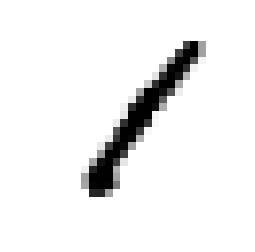

In [12]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X.iloc[0,:]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

### Split the mnist training data into a training and testing set

In [13]:
X_train, X_test, y_train, y_test = X.iloc[:32000, :], X.iloc[32000:, :], y.iloc[:32000], y.iloc[32000:]

### Change the lables to true/false when the label equals five

In [14]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### Create the SGD Classifier and fit/train it

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

### Print an image of a row in the test set that is a five

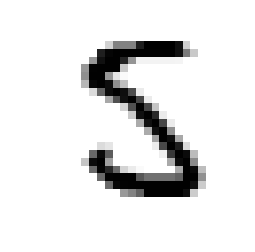

In [16]:
some_digit = X_test.iloc[17,:]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

### Check to see if SGD predicts five for a row in the test that is a five

In [17]:
sgd_clf.predict([X_test.iloc[17,:]])

array([ True])

### Retrain SGD with full train set

In [18]:
sgd_clf.fit(X, y)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

### Load test file into a Panda DataFrame

In [19]:
test_input_file = "./Sample/test.csv"
test_mnist = pd.read_csv(test_input_file, header = 0)

pd.DataFrame.head(test_mnist, 10)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       0       0       0       0       0       0   
6       0       0       0       0       0       0       0       0       0   
7       0       0       0       0       0       0       0       0       0   
8       0       0       0       0       0       0       0       0       0   
9       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   
5       0    ...            0         0         0         0         0   
6       0    ...            0         0         0         0         0   
7       0    ...            0         0         0         0         0   
8       0    ...            0         0         0         0         0   
9       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  
5         0         0         0         0         0  
6         0         0         0         0         0  
7         0         0         0         0         0  
8         0         0         0         0         0  
9         0         0         0         0         0  

[10 rows x 784 columns]

### Predict the the values for the test set and save the results

In [20]:
results = sgd_clf.predict(test_mnist)
results

array([2, 0, 9, ..., 3, 9, 2])

### Create an image of the first row of the test set to verify the SGD predicted correctly

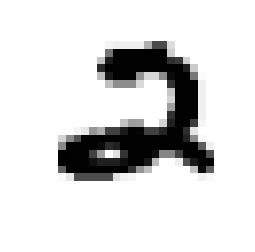

In [21]:
some_digit = test_mnist.iloc[0,:]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

### Export results to CSV to be uploaded to Kaggle

In [22]:
row = range(1, results.size + 1)
result_df = pd.DataFrame({
    'ImageId': row,
    'Label': results
})

result_df[['ImageId', 'Label']].to_csv('./sgd_results.csv', sep=',', index = False, encoding='utf-8')

## Random Forest Classifier

### Load train file into a Panda DataFrame

In [25]:
import numpy as np
import pandas as pd

input_file = "./Sample/train.csv"
mnist = pd.read_csv(input_file, header = 0)

pd.DataFrame.head(mnist, 10)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   
5      0       0       0       0       0       0       0       0       0   
6      7       0       0       0       0       0       0       0       0   
7      3       0       0       0       0       0       0       0       0   
8      5       0       0       0       0       0       0       0       0   
9      3       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   
5       0    ...            0         0         0         0         0   
6       0    ...            0         0         0         0         0   
7       0    ...            0         0         0         0         0   
8       0    ...            0         0         0         0         0   
9       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  
5         0         0         0         0         0  
6         0         0         0         0         0  
7         0         0         0         0         0  
8         0         0         0         0         0  
9         0         0         0         0         0  

[10 rows x 785 columns]

### Separate mnist into two variables

In [26]:
X, y = mnist.iloc[0:, 1:], mnist.iloc[0:,0]

print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


### Print an image of the first row in mnist

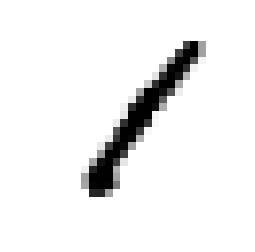

In [27]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X.iloc[0,:]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

### Split the mnist training data into a training and testing set

In [28]:
X_train, X_test, y_train, y_test = X.iloc[:32000, :], X.iloc[32000:, :], y.iloc[:32000], y.iloc[32000:]

### Change the lables to true/false when the label equals five

In [29]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### Create the Random Forest Classifier and fit/train it

In [30]:
from sklearn.ensemble import RandomForestClassifier

tree_clf = RandomForestClassifier(random_state=42)
tree_clf.fit(X_train, y_train_5)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Print an image of a row in the test set that is a five

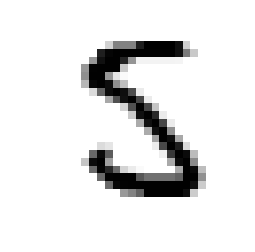

In [31]:
some_digit = X_test.iloc[17,:]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

### Check to see if Random Forest predicts five for a row in the test that is a five

In [32]:
tree_clf.predict([X_test.iloc[17,:]])

array([ True])

### Retrain Random Forest with full train set

In [34]:
tree_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Load test file into a Panda DataFrame

In [36]:
test_input_file = "./Sample/test.csv"
test_mnist = pd.read_csv(test_input_file, header = 0)

pd.DataFrame.head(test_mnist, 10)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       0       0       0       0       0       0   
6       0       0       0       0       0       0       0       0       0   
7       0       0       0       0       0       0       0       0       0   
8       0       0       0       0       0       0       0       0       0   
9       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   
5       0    ...            0         0         0         0         0   
6       0    ...            0         0         0         0         0   
7       0    ...            0         0         0         0         0   
8       0    ...            0         0         0         0         0   
9       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  
5         0         0         0         0         0  
6         0         0         0         0         0  
7         0         0         0         0         0  
8         0         0         0         0         0  
9         0         0         0         0         0  

[10 rows x 784 columns]

### Predict the the values for the test set and save the results

In [37]:
results = tree_clf.predict(test_mnist)
results

array([2, 0, 9, ..., 3, 9, 2])

### Create an image of the fifth row of the test set to verify the Random Forest predicted correctly

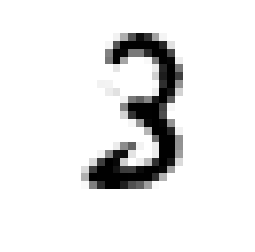

In [38]:
some_digit = test_mnist.iloc[4,:]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

### Export results to CSV to be uploaded to Kaggle

In [39]:
row = range(1, results.size + 1)
result_df = pd.DataFrame({
    'ImageId': row,
    'Label': results
})

result_df[['ImageId', 'Label']].to_csv('./random_forest_results.csv', sep=',', index = False, encoding='utf-8')

## Neural Network

### Load train file into a Panda DataFrame

In [40]:
import numpy as np
import pandas as pd

input_file = "./Sample/train.csv"
mnist = pd.read_csv(input_file, header = 0)

pd.DataFrame.head(mnist, 10)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   
5      0       0       0       0       0       0       0       0       0   
6      7       0       0       0       0       0       0       0       0   
7      3       0       0       0       0       0       0       0       0   
8      5       0       0       0       0       0       0       0       0   
9      3       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   
5       0    ...            0         0         0         0         0   
6       0    ...            0         0         0         0         0   
7       0    ...            0         0         0         0         0   
8       0    ...            0         0         0         0         0   
9       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  
5         0         0         0         0         0  
6         0         0         0         0         0  
7         0         0         0         0         0  
8         0         0         0         0         0  
9         0         0         0         0         0  

[10 rows x 785 columns]

### Import TensorFlow and set up grid size and other variables

In [41]:
import tensorflow as tf

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

### Reset the graph per run.  Used in case changes are made.

In [42]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
reset_graph()

### Setup X and y with as much information as we currently know
- For X, the first value of shape is not known yet, but will be filled in, but the second value is known
- For y, the shape is not yet known

In [43]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

### Create the neural network layers

In [44]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation = tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

### Calculates the loss and the cross entropy

In [45]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

### Sets the learning rate and the training optimizer

In [47]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

### Evaluates the model as it learns and evaluates it's accuracy

In [48]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

### Set the initializer and saver for the training session
- Saver stores the trained neural network

In [49]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

### Variables to be used in training neural network

In [50]:
n_epochs = 40
batch_size = 50
num_examples = len(mnist)

### Train neural network and print out it's accuracy against the training data

In [51]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(num_examples // batch_size):
            start, end  = iteration * batch_size, (iteration + 1) * batch_size
            X_batch, y_batch = mnist.iloc[start:end, 1:] / 255, mnist.iloc[start:end, 0]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print(epoch, "Train accuracy:", acc_train)

        save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.94
1 Train accuracy: 0.96
2 Train accuracy: 0.98
3 Train accuracy: 0.98
4 Train accuracy: 0.98
5 Train accuracy: 0.98
6 Train accuracy: 1.0
7 Train accuracy: 1.0
8 Train accuracy: 1.0
9 Train accuracy: 1.0
10 Train accuracy: 1.0
11 Train accuracy: 1.0
12 Train accuracy: 1.0
13 Train accuracy: 1.0
14 Train accuracy: 1.0
15 Train accuracy: 1.0
16 Train accuracy: 1.0
17 Train accuracy: 1.0
18 Train accuracy: 1.0
19 Train accuracy: 1.0
20 Train accuracy: 1.0
21 Train accuracy: 1.0
22 Train accuracy: 1.0
23 Train accuracy: 1.0
24 Train accuracy: 1.0
25 Train accuracy: 1.0
26 Train accuracy: 1.0
27 Train accuracy: 1.0
28 Train accuracy: 1.0
29 Train accuracy: 1.0
30 Train accuracy: 1.0
31 Train accuracy: 1.0
32 Train accuracy: 1.0
33 Train accuracy: 1.0
34 Train accuracy: 1.0
35 Train accuracy: 1.0
36 Train accuracy: 1.0
37 Train accuracy: 1.0
38 Train accuracy: 1.0
39 Train accuracy: 1.0


### Load test file into a Panda DataFrame

In [52]:
test_input_file = "./Sample/test.csv"
test_mnist = pd.read_csv(test_input_file, header = 0)

pd.DataFrame.head(test_mnist, 10)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       0       0       0       0       0       0   
6       0       0       0       0       0       0       0       0       0   
7       0       0       0       0       0       0       0       0       0   
8       0       0       0       0       0       0       0       0       0   
9       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   
5       0    ...            0         0         0         0         0   
6       0    ...            0         0         0         0         0   
7       0    ...            0         0         0         0         0   
8       0    ...            0         0         0         0         0   
9       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  
5         0         0         0         0         0  
6         0         0         0         0         0  
7         0         0         0         0         0  
8         0         0         0         0         0  
9         0         0         0         0         0  

[10 rows x 784 columns]

### Predict the the values for the test set and save the results

In [53]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = test_mnist
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


### Print predicted results

In [54]:
print("Predicted classes:", y_pred)

Predicted classes: [2 0 9 ... 3 9 2]


### Export results to CSV to be uploaded to Kaggle

In [55]:
row = range(1, y_pred.size + 1)
result_df = pd.DataFrame({
    'ImageId': row,
    'Label': y_pred
})

result_df[['ImageId', 'Label']].to_csv('./neural_network_results.csv', sep=',', index = False, encoding='utf-8')

## Convolutional Neural Networks

### Load train file into a Panda DataFrame

In [56]:
import numpy as np
import pandas as pd

input_file = "./Sample/train.csv"
mnist = pd.read_csv(input_file, header = 0)

pd.DataFrame.head(mnist, 10)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   
5      0       0       0       0       0       0       0       0       0   
6      7       0       0       0       0       0       0       0       0   
7      3       0       0       0       0       0       0       0       0   
8      5       0       0       0       0       0       0       0       0   
9      3       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   
5       0    ...            0         0         0         0         0   
6       0    ...            0         0         0         0         0   
7       0    ...            0         0         0         0         0   
8       0    ...            0         0         0         0         0   
9       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  
5         0         0         0         0         0  
6         0         0         0         0         0  
7         0         0         0         0         0  
8         0         0         0         0         0  
9         0         0         0         0         0  

[10 rows x 785 columns]

### Import TensorFlow and set up grid size and other variables

In [57]:
import tensorflow as tf

height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 10

### Reset the graph per run.  Used in case changes are made.

In [58]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

### Create the pooling layers

In [59]:
reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")

maxpool1 = tf.layers.max_pooling2d(conv1, pool_size=[2, 2], strides=2)

conv2 = tf.layers.conv2d(maxpool1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("conv2_flat"):
    conv2_flat = tf.reshape(conv2, shape=[-1, pool3_fmaps * 7 * 7])
    
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(conv2_flat, n_fc1, activation=tf.nn.relu, name="fc1")
    
with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

### Calculates the loss and the cross entropy and sets the learning rate and the training optimizer

In [60]:
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

### Evaluates the model as it learns and evaluates it's accuracy

In [61]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

### Set the initializer and saver for the training session
- Saver stores the trained neural network

In [62]:
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

### Train neural network and print out it's accuracy against the training data

In [63]:
n_epochs = 10
batch_size = 100
num_examples = len(mnist)

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(num_examples // batch_size):
            start, end  = iteration * batch_size, (iteration + 1) * batch_size
            X_batch, y_batch = mnist.iloc[start:end, 1:] / 255, mnist.iloc[start:end, 0]
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print(epoch, "Train accuracy:", acc_train)

        save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 0.99
1 Train accuracy: 0.99
2 Train accuracy: 1.0
3 Train accuracy: 1.0
4 Train accuracy: 1.0
5 Train accuracy: 1.0
6 Train accuracy: 1.0
7 Train accuracy: 1.0
8 Train accuracy: 1.0
9 Train accuracy: 1.0


### Load test file into a Panda DataFrame

In [64]:
test_input_file = "./Sample/test.csv"
test_mnist = pd.read_csv(test_input_file, header = 0)

pd.DataFrame.head(test_mnist, 10)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       0       0       0       0       0       0   
6       0       0       0       0       0       0       0       0       0   
7       0       0       0       0       0       0       0       0       0   
8       0       0       0       0       0       0       0       0       0   
9       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   
5       0    ...            0         0         0         0         0   
6       0    ...            0         0         0         0         0   
7       0    ...            0         0         0         0         0   
8       0    ...            0         0         0         0         0   
9       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  
5         0         0         0         0         0  
6         0         0         0         0         0  
7         0         0         0         0         0  
8         0         0         0         0         0  
9         0         0         0         0         0  

[10 rows x 784 columns]

### Predict the the values for the test set and save the results

In [65]:
with tf.Session() as sess:
    saver.restore(sess, "./my_mnist_model") # or better, use save_path
    X_new_scaled = test_mnist
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_mnist_model


### Print predicted results

In [66]:
print("Predicted classes:", y_pred)

Predicted classes: [2 0 9 ... 3 9 2]


### Export results to CSV to be uploaded to Kaggle

In [67]:
row = range(1, y_pred.size + 1)
result_df = pd.DataFrame({
    'ImageId': row,
    'Label': y_pred
})

result_df[['ImageId', 'Label']].to_csv('./convolutional_neural_networks_results.csv', sep=',', index = False, encoding='utf-8')